<a href="https://colab.research.google.com/github/IrinaFab/Bank-MK/blob/main/irina_BankMkt_modeling_June_29.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Marketing Bank Dataset EDA

#### The binary classification goal is to predict if the client will subscribe a bank term deposit (variable y).

#### [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001

#### Available at:

[pdf] http://dx.doi.org/10.1016/j.dss.2014.03.001\n",
        
[bib] http://www3.dsi.uminho.pt/pcortez/bib/2014-dss.txt"

In [ ]:
# Import libraries
## Basic libs
import pandas as pd
import numpy as np
from operator import itemgetter 
import warnings
from pandas._libs import index
## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn import tree
from sklearn.tree import _tree
# from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import RandomForestClassifier 
# from sklearn.ensemble import GradientBoostingRegressor   
from sklearn.ensemble import GradientBoostingClassifier  

# Configure libraries
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('seaborn')

Mounting Google Drive to Colab Environment

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Loading data


###Input variables:

* bank client data 

  1. age (numeric)
  2. job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed','services','student', 'technician', 'unemployed', 'unknown')
  3. marital : marital status (categorical: 'divorced', 'married', 'single','unknown'; note: 'divorced' means divorced or widowed)
  4. education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
  5. default: has credit in default? (categorical: 'no', 'yes', 'unknown')
  6. housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
  7. loan: has personal loan? (categorical: 'no','yes','unknown')

* related with the last contact of the current campaign
  8. contact: contact communication type (categorical: 'cellular', 'telephone') 
  9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec') 
  10. day_of_week: last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')
  11. duration: last contact duration, in seconds (numeric)  
### Note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). The duration is not known before a call is performed. Also, after the end of the call, y IS known. Thus, this input should only be included for benchmark purposes and discarded if the intention is to have a realistic predictive model.

* other attributes  
  12. campaign: number of contacts performed during this campaign and for this client (numeric: includes last contact)
  13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric: 999 means client was not previously contacted) 
  14. previous: number of contacts performed before this campaign and for this client (numeric) 
  15. poutcome: outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')

* social and economic context attributes
  16. emp.var.rate: employment variation rate - quarterly indicator (numeric)  
  17. cons.price.idx: consumer price index - monthly indicator (numeric)     
  18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
  19. euribor3m: euribor 3 month-rate - daily indicator (numeric: computed by the European Central Bank (ECB) and published by Thomson Reuters, i.e., a publicly available and widely used index)
  20. nr.employed: number of employees - quarterly indicator (numeric)

* Output variable (desired target):
  21. y: has the client subscribed a term deposit? (binary: 'yes','no')

In [ ]:
url = 'https://raw.githubusercontent.com/ShawnLiu119/CapstoneProject_BankingMarketing/main/rawdata/bank-additional-full.csv'
data = pd.read_csv(url, sep=';')

# data = pd.read_csv('/content/drive/MyDrive/bank.csv')

In [ ]:
# data_Dictionary = pd.read_excel('....')
# data_Dictionary

In [ ]:
data.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
age,56,57,37,40,56,45,59,41,24,25,41,25,29,57,35
job,housemaid,services,services,admin.,services,services,admin.,blue-collar,technician,services,blue-collar,services,blue-collar,housemaid,blue-collar
marital,married,married,married,married,married,married,married,married,single,single,married,single,single,divorced,married
education,basic.4y,high.school,high.school,basic.6y,high.school,basic.9y,professional.course,unknown,professional.course,high.school,unknown,high.school,high.school,basic.4y,basic.6y
default,no,unknown,no,no,no,unknown,no,unknown,no,no,unknown,no,no,no,no
housing,no,no,yes,no,no,no,no,no,yes,yes,no,yes,no,yes,yes
loan,no,no,no,no,yes,no,no,no,no,no,no,no,yes,no,no
contact,telephone,telephone,telephone,telephone,telephone,telephone,telephone,telephone,telephone,telephone,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may,may,may,may,may,may,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon,mon,mon,mon,mon,mon,mon,mon,mon,mon,mon


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
# displaying the data types and store into a variable
dt = data.dtypes
dt

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [ ]:
TARGET = 'y'

In [ ]:
data.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [ ]:
# # Making a list of missing value types
missing_values = ["unknown"]

# reading the data again, with the defined non-standard missing value
url = 'https://raw.githubusercontent.com/ShawnLiu119/CapstoneProject_BankingMarketing/main/rawdata/bank-additional-full.csv'
data = pd.read_csv(url, sep=';', na_values = missing_values)

print(data.isna().sum())

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


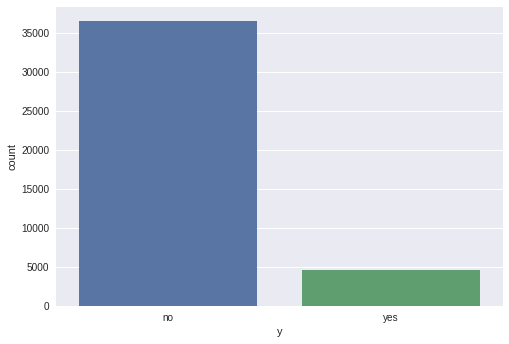

In [ ]:
sns.countplot(x=TARGET,data=data)

In [ ]:
d1=data.copy()
d2=d1[d1.y=='yes']
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
data=d1

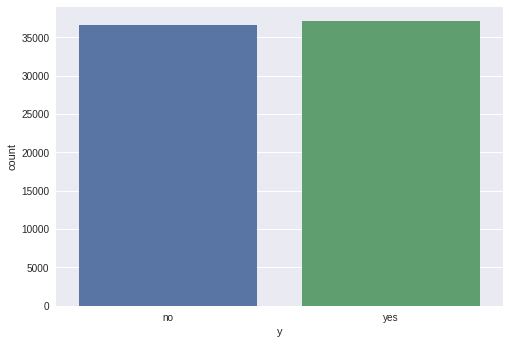

In [ ]:
sns.countplot(x=TARGET,data=data)

In [ ]:
data['y'].value_counts()

yes    37120
no     36548
Name: y, dtype: int64

In [ ]:
data['y'].value_counts(normalize='True')

yes    0.503882
no     0.496118
Name: y, dtype: float64

In [ ]:
objList = []
intList = []
floatList = []

for i in dt.index:
    if i in ([TARGET]) : continue
    if dt[i] in (['object']) : objList.append(i)
    if dt[i] in (['int64']) : intList.append(i)
    if dt[i] in (['float64']) : floatList.append(i)
        
print('OBJECTS')
print('-------')
for i in objList:
    print(i)
print('\n')

print('INTEGERS')
print('--------')
for i in intList:
    print(i)
print('\n')

print('FLOATS')
print('------')
for i in floatList:
  print(i)

OBJECTS
-------
job
marital
education
default
housing
loan
contact
month
day_of_week
poutcome


INTEGERS
--------
age
duration
campaign
pdays
previous


FLOATS
------
emp.var.rate
cons.price.idx
cons.conf.idx
euribor3m
nr.employed


In [ ]:
for col in objList:
    print(col)
    print(data[col].unique())

job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' nan 'entrepreneur' 'student']
marital
['married' 'single' 'divorced' nan]
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course' nan
 'university.degree' 'illiterate']
default
['no' nan 'yes']
housing
['no' 'yes' nan]
loan
['no' 'yes' nan]
contact
['telephone' 'cellular']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
poutcome
['nonexistent' 'failure' 'success']


In [ ]:
for col in intList:
    print(col)
    print(data[col].unique())

age
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
duration
[ 261  149  226 ... 1246 1556 1868]
campaign
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43]
pdays
[999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20]
previous
[0 1 2 3 4 5 6 7]


In [ ]:
for col in floatList:
    print(col)
    print(data[col].unique())

emp.var.rate
[ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]
cons.price.idx
[93.994 94.465 93.918 93.444 93.798 93.2   92.756 92.843 93.075 92.893
 92.963 92.469 92.201 92.379 92.431 92.649 92.713 93.369 93.749 93.876
 94.055 94.215 94.027 94.199 94.601 94.767]
cons.conf.idx
[-36.4 -41.8 -42.7 -36.1 -40.4 -42.  -45.9 -50.  -47.1 -46.2 -40.8 -33.6
 -31.4 -29.8 -26.9 -30.1 -33.  -34.8 -34.6 -40.  -39.8 -40.3 -38.3 -37.5
 -49.5 -50.8]
euribor3m
[4.857 4.856 4.855 4.859 4.86  4.858 4.864 4.865 4.866 4.967 4.961 4.959
 4.958 4.96  4.962 4.955 4.947 4.956 4.966 4.963 4.957 4.968 4.97  4.965
 4.964 5.045 5.    4.936 4.921 4.918 4.912 4.827 4.794 4.76  4.733 4.7
 4.663 4.592 4.474 4.406 4.343 4.286 4.245 4.223 4.191 4.153 4.12  4.076
 4.021 3.901 3.879 3.853 3.816 3.743 3.669 3.563 3.488 3.428 3.329 3.282
 3.053 1.811 1.799 1.778 1.757 1.726 1.703 1.687 1.663 1.65  1.64  1.629
 1.614 1.602 1.584 1.574 1.56  1.556 1.548 1.538 1.531 1.52  1.51  1.498
 1.483 1.479 1.466 1.453 1.445 1.435 1.42

In [ ]:
#replacing no and yes by 0 and 1 respectively as our target values!
data[TARGET] = data[TARGET].replace(['no','yes'],[0,1])
data[TARGET].unique()

array([0, 1])

In [ ]:
################################################### Drop 'duration' column #####. not sure about "campaign"
data = data.drop('duration', axis=1)

In [ ]:
data.shape

(73668, 20)

In [ ]:
# using one hot encoding to transform the categorical variables into numeric variables
for i in objList :
    print('Class = ', i )
    thePrefix = 'z_' + i
    print( thePrefix )
    y = pd.get_dummies(data[i], prefix = thePrefix, dummy_na = False) 
    print(type(y)) 
    print(y.head().T )
    data = pd.concat([data, y], axis = 1 )
    data = data.drop(i, axis = 1 )

Class =  job
z_job
<class 'pandas.core.frame.DataFrame'>
                     0  1  2  3  4
z_job_admin.         0  0  0  1  0
z_job_blue-collar    0  0  0  0  0
z_job_entrepreneur   0  0  0  0  0
z_job_housemaid      1  0  0  0  0
z_job_management     0  0  0  0  0
z_job_retired        0  0  0  0  0
z_job_self-employed  0  0  0  0  0
z_job_services       0  1  1  0  1
z_job_student        0  0  0  0  0
z_job_technician     0  0  0  0  0
z_job_unemployed     0  0  0  0  0
Class =  marital
z_marital
<class 'pandas.core.frame.DataFrame'>
                    0  1  2  3  4
z_marital_divorced  0  0  0  0  0
z_marital_married   1  1  1  1  1
z_marital_single    0  0  0  0  0
Class =  education
z_education
<class 'pandas.core.frame.DataFrame'>
                                 0  1  2  3  4
z_education_basic.4y             1  0  0  0  0
z_education_basic.6y             0  0  0  1  0
z_education_basic.9y             0  0  0  0  0
z_education_high.school          0  1  1  0  1
z_education_illite

In [ ]:
data.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
age,56.000,57.000,37.000,40.000,56.000,45.000,59.000,41.000,24.000,25.000,41.000,25.000,29.000,57.000,35.000
campaign,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
pdays,999.000,999.000,999.000,999.000,999.000,999.000,999.000,999.000,999.000,999.000,999.000,999.000,999.000,999.000,999.000
previous,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
emp.var.rate,1.100,1.100,1.100,1.100,1.100,1.100,1.100,1.100,1.100,1.100,1.100,1.100,1.100,1.100,1.100
cons.price.idx,93.994,93.994,93.994,93.994,93.994,93.994,93.994,93.994,93.994,93.994,93.994,93.994,93.994,93.994,93.994
cons.conf.idx,-36.400,-36.400,-36.400,-36.400,-36.400,-36.400,-36.400,-36.400,-36.400,-36.400,-36.400,-36.400,-36.400,-36.400,-36.400
euribor3m,4.857,4.857,4.857,4.857,4.857,4.857,4.857,4.857,4.857,4.857,4.857,4.857,4.857,4.857,4.857
nr.employed,5191.000,5191.000,5191.000,5191.000,5191.000,5191.000,5191.000,5191.000,5191.000,5191.000,5191.000,5191.000,5191.000,5191.000,5191.000
y,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [ ]:
data.shape

(73668, 57)

Split data

In [ ]:
# creating a copy of the data set
x = data.copy()
x.head().T

,0,1,2,3,4
age,56.000,57.000,37.000,40.000,56.000
campaign,1.000,1.000,1.000,1.000,1.000
pdays,999.000,999.000,999.000,999.000,999.000
previous,0.000,0.000,0.000,0.000,0.000
emp.var.rate,1.100,1.100,1.100,1.100,1.100
cons.price.idx,93.994,93.994,93.994,93.994,93.994
cons.conf.idx,-36.400,-36.400,-36.400,-36.400,-36.400
euribor3m,4.857,4.857,4.857,4.857,4.857
nr.employed,5191.000,5191.000,5191.000,5191.000,5191.000
y,0.000,0.000,0.000,0.000,0.000


In [ ]:
#Preparing the data to be used to build the decision tree, drop TARGET 
x = x.drop( TARGET, axis = 1 )
x.head().T

,0,1,2,3,4
age,56.000,57.000,37.000,40.000,56.000
campaign,1.000,1.000,1.000,1.000,1.000
pdays,999.000,999.000,999.000,999.000,999.000
previous,0.000,0.000,0.000,0.000,0.000
emp.var.rate,1.100,1.100,1.100,1.100,1.100
cons.price.idx,93.994,93.994,93.994,93.994,93.994
cons.conf.idx,-36.400,-36.400,-36.400,-36.400,-36.400
euribor3m,4.857,4.857,4.857,4.857,4.857
nr.employed,5191.000,5191.000,5191.000,5191.000,5191.000
z_job_admin.,0.000,0.000,0.000,1.000,0.000


In [ ]:
# storing the target into a dataframe
y = data[[TARGET]] 
y.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
y,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Splitting dataset 

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 1)

In [ ]:
print('FLAG DATA:', '\n')
print('Shape of original INPUT data set:', x.shape)
print('Shape of original OUTPUT data set:', y.shape, '\n')
print('Shape of input TRAINING data set = ', x_train.shape)
print('Shape of output TRAINING data set = ', y_train.shape, '\n')
print('Shape of input TEST data set = ', x_test.shape)
print('Shape of output TEST data set = ', y_test.shape)

FLAG DATA: 

Shape of original INPUT data set: (73668, 56)
Shape of original OUTPUT data set: (73668, 1) 

Shape of input TRAINING data set =  (58934, 56)
Shape of output TRAINING data set =  (58934, 1) 

Shape of input TEST data set =  (14734, 56)
Shape of output TEST data set =  (14734, 1)


In [ ]:
# displaying the first five records in the train var. data set
x_train.head().T

,27948,38688,34857,9339,18351
age,34.000,69.000,31.000,38.000,36.000
campaign,4.000,1.000,6.000,2.000,2.000
pdays,999.000,999.000,999.000,999.000,999.000
previous,0.000,0.000,1.000,0.000,0.000
emp.var.rate,-1.800,-3.400,-1.800,1.400,1.400
cons.price.idx,92.843,92.649,92.893,94.465,93.918
cons.conf.idx,-50.000,-30.100,-46.200,-41.800,-42.700
euribor3m,1.520,0.715,1.250,4.967,4.968
nr.employed,5099.100,5017.500,5099.100,5228.100,5228.100
z_job_admin.,0.000,0.000,0.000,1.000,0.000


In [ ]:
# displaying the first five records in the train predictions data set

y_train.head().T

,27948,38688,34857,9339,18351
y,0,1,0,0,0


###Decision Tree classification task

In [ ]:
# creating decision tree classifier my_tree setting 4-level deep with respect of TARGET
# fitting the decision tree 

my_tree = tree.DecisionTreeClassifier (max_depth = 4) 
my_tree = my_tree.fit (x_train, y_train [ TARGET]) 

In [ ]:
# predicting subscription chances for the training and test data
y_Pred_train = my_tree.predict(x_train)
y_Pred_test = my_tree.predict(x_test)

In [ ]:
# calculating the accuracy based on the metrics between the real scores and the predicted ones for both taining and test data sets
print('The accuracy of the model based on the training data set is ', metrics.accuracy_score(y_train [TARGET], y_Pred_train))
print('The accuracy of the model based on the test data set is ', metrics.accuracy_score(y_test [TARGET], y_Pred_test))

The accuracy of the model based on the training data set is  0.7369599891403943
The accuracy of the model based on the test data set is  0.7410071942446043


Decision tree is 73.69% accurate, meaning that 73.69% of the time my predictions were correct for the training data set. Decision tree is 74.10% accurate, meaning that 74.10% of the time my predictions were correct for the test data set. The two values testing the accuracy on training and test data are very close meaning that the model is a good model.

RECEIVER OPERATING CHARACTERISTICS (ROC) CURVE


*   An ROC curve plots TPR vs. FPR at different classification thresholds.
*   Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives. 

In [ ]:
# predicting probability for training data set
probs = my_tree.predict_proba(x_train)

In [ ]:
# displaying the first ten probabilities for training data set
probs[0:10]

array([[0.33866933, 0.66133067],
       [0.19226804, 0.80773196],
       [0.63998548, 0.36001452],
       [0.74073575, 0.25926425],
       [0.63998548, 0.36001452],
       [0.74073575, 0.25926425],
       [0.82495667, 0.17504333],
       [0.74073575, 0.25926425],
       [0.63998548, 0.36001452],
       [0.63998548, 0.36001452]])

In [ ]:
# prediction for the first 10 people; .....out of the first ten recods, none is predicted to subscribe
y_Pred_train [0:10]

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# probability subscription for test data set
p1 = probs[:,1]

# displaying the subsc probability for the first 10 records for test data set
p1[0:10]


array([0.66133067, 0.80773196, 0.36001452, 0.25926425, 0.36001452,
       0.25926425, 0.17504333, 0.25926425, 0.36001452, 0.36001452])

In [ ]:
# predicting probability for test data set

probs = my_tree.predict_proba(x_test)
probs[0:10]

array([[0.33866933, 0.66133067],
       [0.63998548, 0.36001452],
       [0.04290894, 0.95709106],
       [0.63998548, 0.36001452],
       [0.63998548, 0.36001452],
       [0.12708934, 0.87291066],
       [0.82495667, 0.17504333],
       [0.19226804, 0.80773196],
       [0.63998548, 0.36001452],
       [0.12708934, 0.87291066]])

In [ ]:
'''
TRAINING DATA
False positive rate (1 - SPECIFICITY) shows the proportion of subsc incorrectly classified as non-subscribers
True positive rate (SENSITIVITY) shows the proportion of subsc correctly classified
'''
fpr_train, tpr_train, treshhold = metrics.roc_curve (y_train [TARGET], p1)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

In [ ]:
# probability subscribers for test data set
p1 = probs[:,1]

# displaying the deposit subscribers probability for the first 10 records for test data set
p1[0:10]

array([0.66133067, 0.36001452, 0.95709106, 0.36001452, 0.36001452,
       0.87291066, 0.17504333, 0.80773196, 0.36001452, 0.87291066])

In [ ]:
## TEST DATA
fpr_test, tpr_test, threshold = metrics.roc_curve( y_test[TARGET], p1)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

In [ ]:
# False Positive Rate for first 10 records for training data set 
fpr_train[0:10] 

array([0.        , 0.00729852, 0.00805236, 0.0111705 , 0.02628152,
       0.03080455, 0.03097588, 0.0693188 , 0.07627467, 0.12266996])

In [ ]:
# True Positive Rate for first 10 records for training data set 
tpr_train[0:10]

array([0.        , 0.15969748, 0.16867227, 0.19801681, 0.29983193,
       0.32840336, 0.32917647, 0.48719328, 0.50984874, 0.59872269])

In [ ]:
# False Positive Rate for first 10 records for test data set 
fpr_test[0:10]

array([0.        , 0.0065182 , 0.00692558, 0.00909832, 0.02376426,
       0.02756654, 0.02783813, 0.06151548, 0.06925584, 0.11338946])

In [ ]:
# Test Positive Rate for first 10 records for test data set 
tpr_test[0:10]

array([0.        , 0.15535957, 0.16472185, 0.19389417, 0.29199457,
       0.31994573, 0.32116689, 0.48005427, 0.50257802, 0.5953867 ])

In [ ]:
fpr_tree = fpr_test
tpr_tree = tpr_test
auc_tree = roc_auc_test

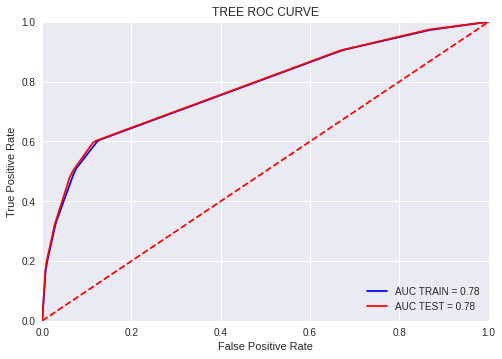

In [ ]:
# printing ROC curve using matplotlib for training and test data 

plt.title('TREE ROC CURVE')
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC TRAIN = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'b', label = 'AUC TEST = %0.2f' % roc_auc_test, color = 'red')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The larger the area under the curve (or the higher the ROC curve), the better is the performance. The ROC in the figure has a high AUC (area under the curve).  We can also see there’s a point on the graph where TPR(sensitivity) is quite high and FPR(1-specificity) is dramatically low. If we go back and look at our business need, we needed a high TPR and low FPR that is exactly what we are getting from that point on this ROC. The threshold corresponding to that point can be said to be the best threshold value. The diagonal line represents the values where the true positive rate is equal to the false positive rate. The blue line represents the ROC curve for the training data set and its AUC is 78%. The red line represents the ROC curve for the test training set and its AUC is 78%. The test data and the training data are similar.




 VISUALIZATION OF THE TREE

In [ ]:
feature_cols = list(x.columns.values) 
tree.export_graphviz(my_tree, out_file = 'BANK.txt',filled = True, rounded = True, feature_names = feature_cols, impurity = False, class_names=['YES', 'NO'])

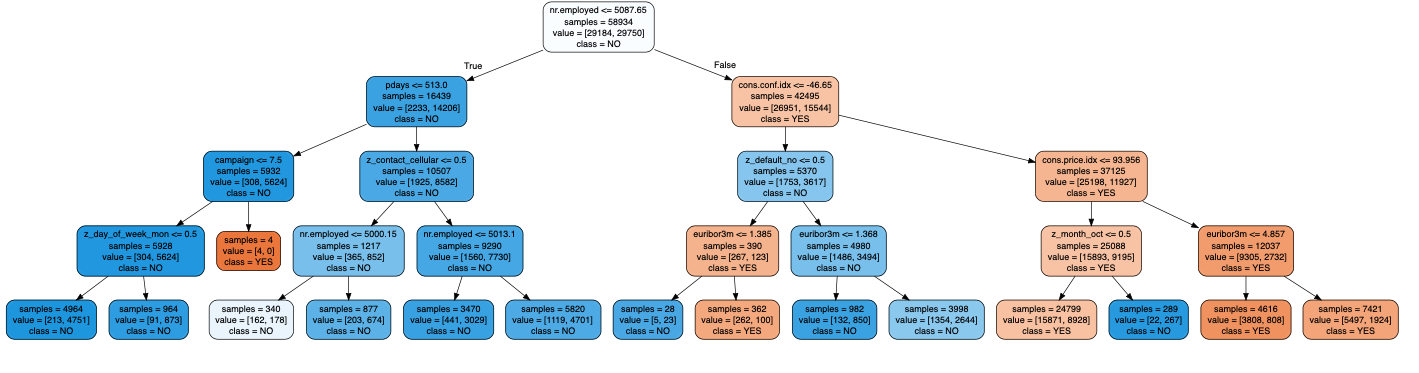

In [ ]:
def getTreeVars( TREE, varNames ) :
    tree_ = TREE.tree_
    varName = [ varNames[i] if i != _tree.TREE_UNDEFINED else 'undefined!' for i in tree_.feature ]
    nameSet = set()
    for i in tree_.feature :
        if i != _tree.TREE_UNDEFINED :
            nameSet.add( i )
    nameList = list( nameSet )
    parameter_list = list()
    for i in nameList :
        parameter_list.append( varNames[i] )
    return parameter_list

In [ ]:
vars_tree_flag = getTreeVars( my_tree, feature_cols )

In [ ]:
for i in vars_tree_flag:
    print(i)

campaign
pdays
z_contact_cellular
cons.price.idx
cons.conf.idx
euribor3m
nr.employed
z_month_oct
z_day_of_week_mon
z_default_no


These are the only variables that will be used and are predictive of deposit subscription.

###  Random Forest





In [ ]:
# creating tree search function for Random Forest

def getEnsembleTreeVars( ENSTREE, varNames ) :
    importance = ENSTREE.feature_importances_
    index = np.argsort(importance)
    theList = []
    for i in index :
        imp_val = importance[i]
        if imp_val > np.average( ENSTREE.feature_importances_ ) :
            v = int( imp_val / np.max( ENSTREE.feature_importances_ ) * 100 )
            theList.append( ( varNames[i], v ) )
    theList = sorted(theList,key = itemgetter(1),reverse = True)
    return theList

In [ ]:
# random forest classifier with respect to TARGET; 100 decision trees; random starting state to get the same results

fm01_RF = RandomForestClassifier( n_estimators = 100, random_state = 1 )
fm01_RF = fm01_RF.fit(x_train, y_train[ TARGET] )

In [ ]:
# calculate the accuracy
print('RANDOM FOREST:')
print('Probability of deposit subscription', '\n')
print('The accuracy of the model based on the training data set is ',metrics.accuracy_score(y_train[TARGET], y_Pred_train))
print('The accuracy of the model based on the test data set is',metrics.accuracy_score(y_test[TARGET], y_Pred_test))

RANDOM FOREST:
Probability of deposit subscription 

The accuracy of the model based on the training data set is  0.7369599891403943
The accuracy of the model based on the test data set is 0.7410071942446043


In [ ]:
# scoring the predictions (client subscribes or not)
y_Pred_train = fm01_RF.predict(x_train)
y_Pred_test = fm01_RF.predict(x_test)

In [ ]:
# create a ROC curve
probs = fm01_RF.predict_proba(x_train)
p1 = probs[:,1]
fpr_train, tpr_train, threshold = metrics.roc_curve( y_train[TARGET], p1)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

probs = fm01_RF.predict_proba(x_test)
p1 = probs[:,1]
fpr_test, tpr_test, threshold = metrics.roc_curve( y_test[TARGET], p1)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

In [ ]:
# saving them for final comparison 
fpr_RF = fpr_test
tpr_RF = tpr_test
auc_RF = roc_auc_test

In [ ]:
feature_cols = list( x.columns.values )
vars_RF_flag = getEnsembleTreeVars( fm01_RF, feature_cols )

In [ ]:
# printing the variables that are the most important
for i in vars_RF_flag :
   print( i )

('age', 100)
('euribor3m', 82)
('campaign', 55)
('nr.employed', 42)
('emp.var.rate', 32)
('cons.conf.idx', 21)
('z_default_no', 13)
('z_housing_no', 13)
('z_housing_yes', 13)
('pdays', 13)
('cons.price.idx', 12)


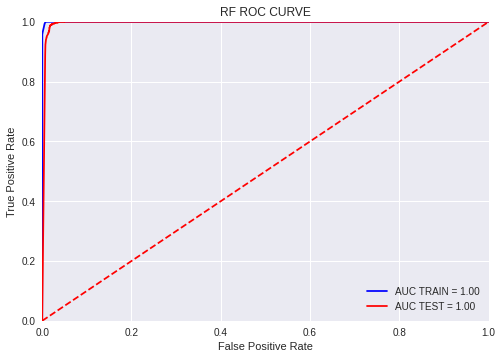

In [ ]:
# creating ROC curve
plt.title('RF ROC CURVE')
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC TRAIN = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'b', label = 'AUC TEST = %0.2f' % roc_auc_test, color = 'red')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Gradient Boosting

In [ ]:
# creating gradient boosting classifier with respect to TARGET
fm01_GB = GradientBoostingClassifier( random_state = 1 )
fm01_GB = fm01_GB.fit( x_train, y_train[ TARGET ] )

In [ ]:
# predicting the training and test data sets
y_Pred_train = fm01_GB.predict(x_train)
y_Pred_test = fm01_GB.predict(x_test)

In [ ]:
# testing the accuracy
print('GRADIENT BOOSTING:')
print('Probability of deposit subscription:', '\n')
print('Accuracy Train:', metrics.accuracy_score(y_train[TARGET], y_Pred_train))
print('Accuracy Test:', metrics.accuracy_score(y_test[TARGET], y_Pred_test))

GRADIENT BOOSTING:
Probability of deposit subscription: 

Accuracy Train: 0.7525706722774629
Accuracy Test: 0.7560743857743993


In [ ]:
# creating the ROC curve
probs = fm01_GB.predict_proba(x_train)
p1 = probs[:,1]
fpr_train, tpr_train, threshold = metrics.roc_curve( y_train[TARGET], p1)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

probs = fm01_GB.predict_proba(x_test)
p1 = probs[:,1]
fpr_test, tpr_test, threshold = metrics.roc_curve( y_test[TARGET], p1)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

fpr_GB = fpr_test
tpr_GB = tpr_test
auc_GB = roc_auc_test

In [ ]:
# printing variables that are predictive of deposit subscription
feature_cols = list( x.columns.values )
vars_GB_flag = getEnsembleTreeVars( fm01_GB, feature_cols )

for i in vars_GB_flag:
    print(i)

('nr.employed', 100)
('euribor3m', 38)
('cons.conf.idx', 10)
('pdays', 5)
('cons.price.idx', 3)
('z_month_oct', 3)


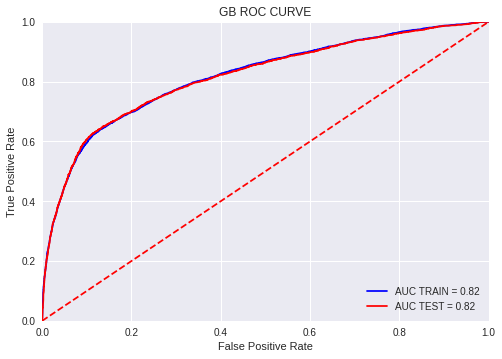

In [ ]:
# creating ROC curve 
plt.title('GB ROC CURVE')
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC TRAIN = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'b', label = 'AUC TEST = %0.2f' % roc_auc_test, color = 'red')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()